In [90]:
library(ggplot2)
library(reshape2)
options(repr.plot.width=10, repr.plot.height=5, repr.plot.res=500)

In [103]:
N = 50
data = cbind(1,matrix(runif(n = N), ncol = 1))
data = cbind(data, data[,2]^2)

In [104]:
coeff = matrix(c(4.5, 3, 2), ncol = 1)

In [105]:
T = data%*%coeff + matrix(rnorm(N, mean = 0, sd = 0.1))

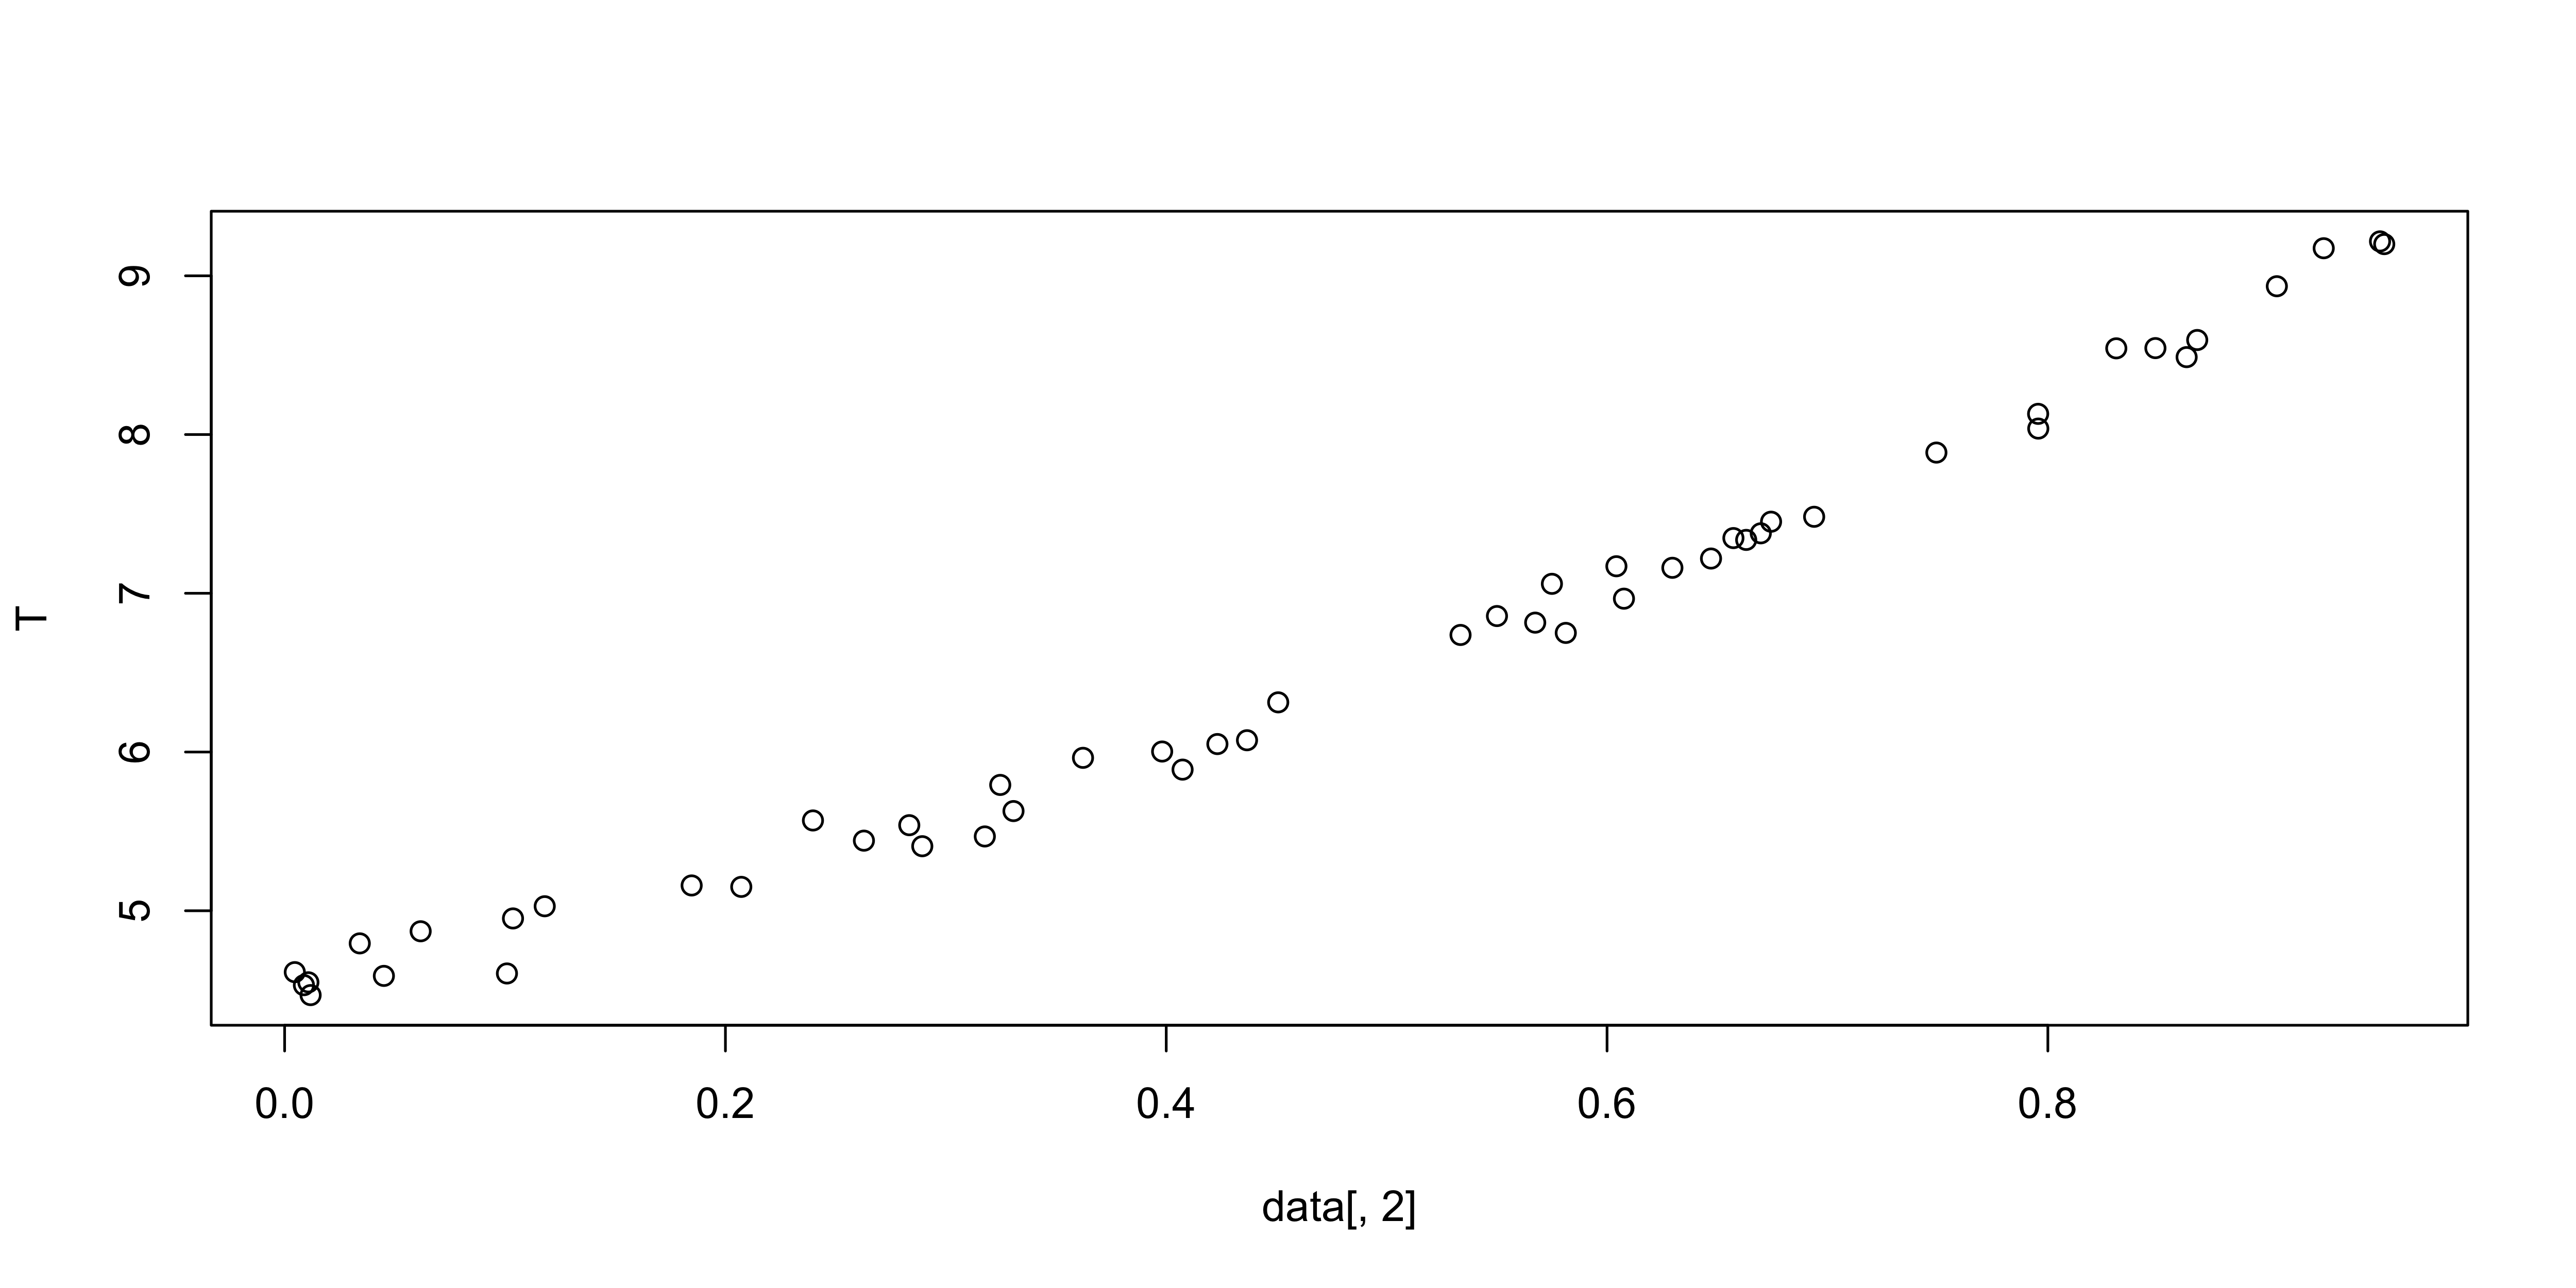

In [106]:
plot(data[,2], T)

In [107]:
X = data[,1:2]

In [108]:
train.idx = sample(1:N, N,  replace = FALSE)

In [109]:
train.data <- X[train.idx,]
train.label <- T[train.idx]

In [110]:
all_data = data.frame(train.data, train.label)

In [111]:
W <- solve(t(train.data)%*%train.data)%*%t(train.data)%*%train.label

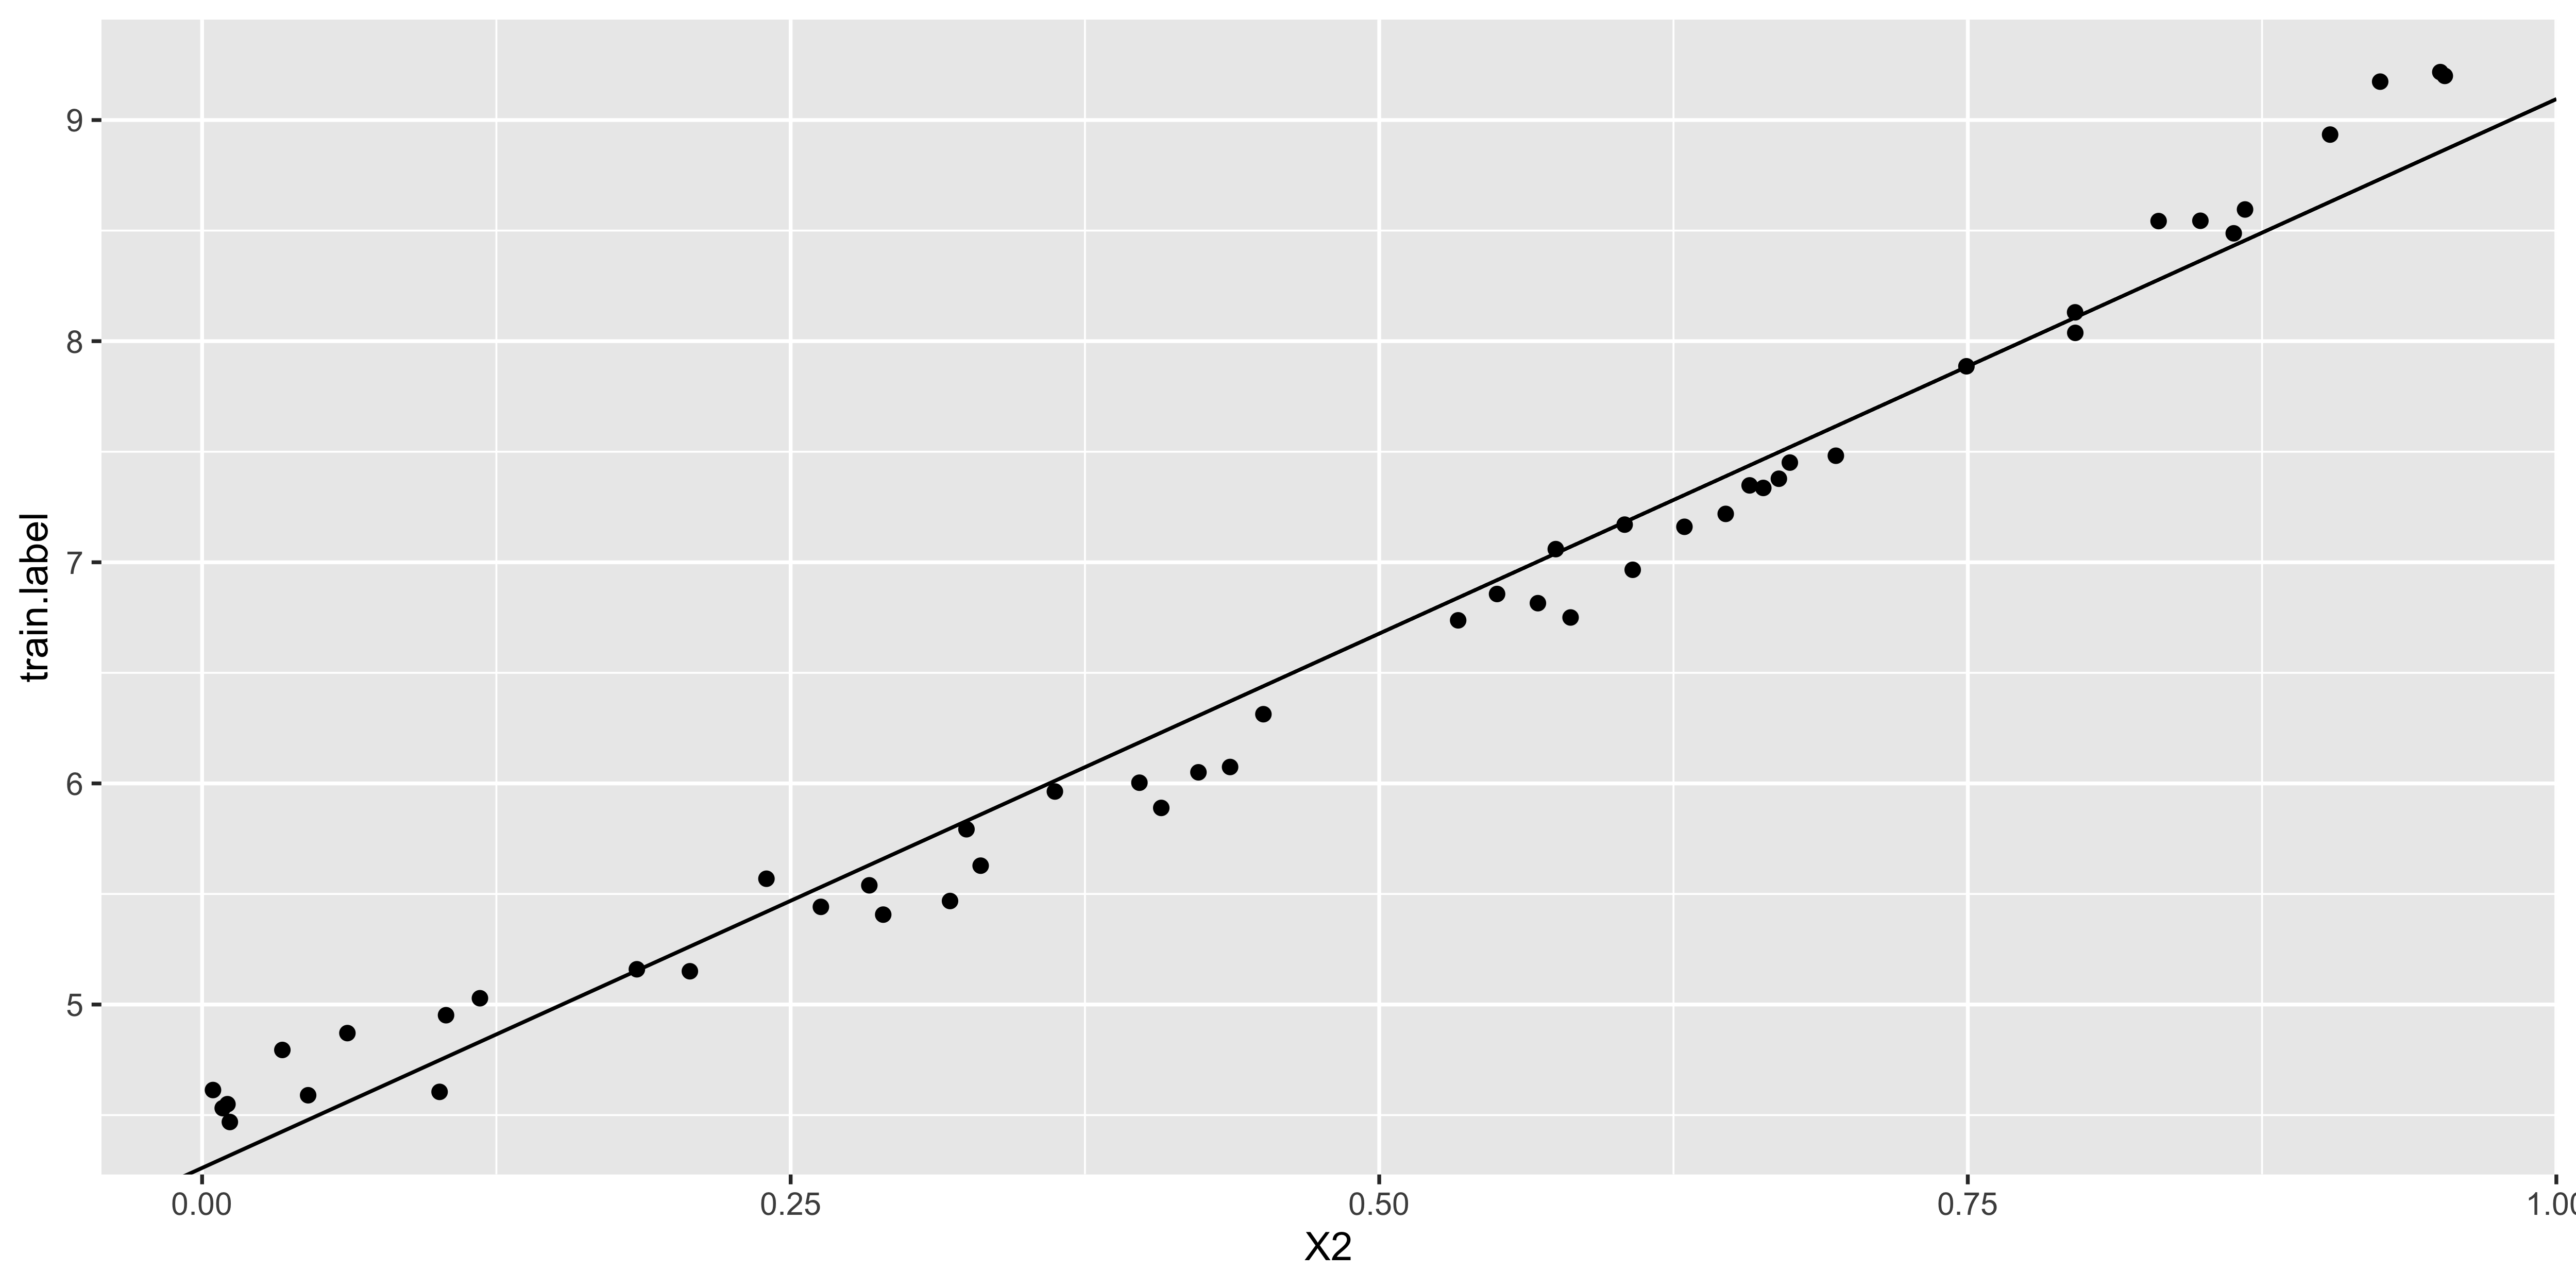

In [112]:
ggplot(all_data, aes(x = X2, y = train.label)) + geom_point() + geom_abline(intercept = W[1], slope = W[2])

In [113]:
boot.idx <- t(matrix(seq(1,N), nrow = N/5))

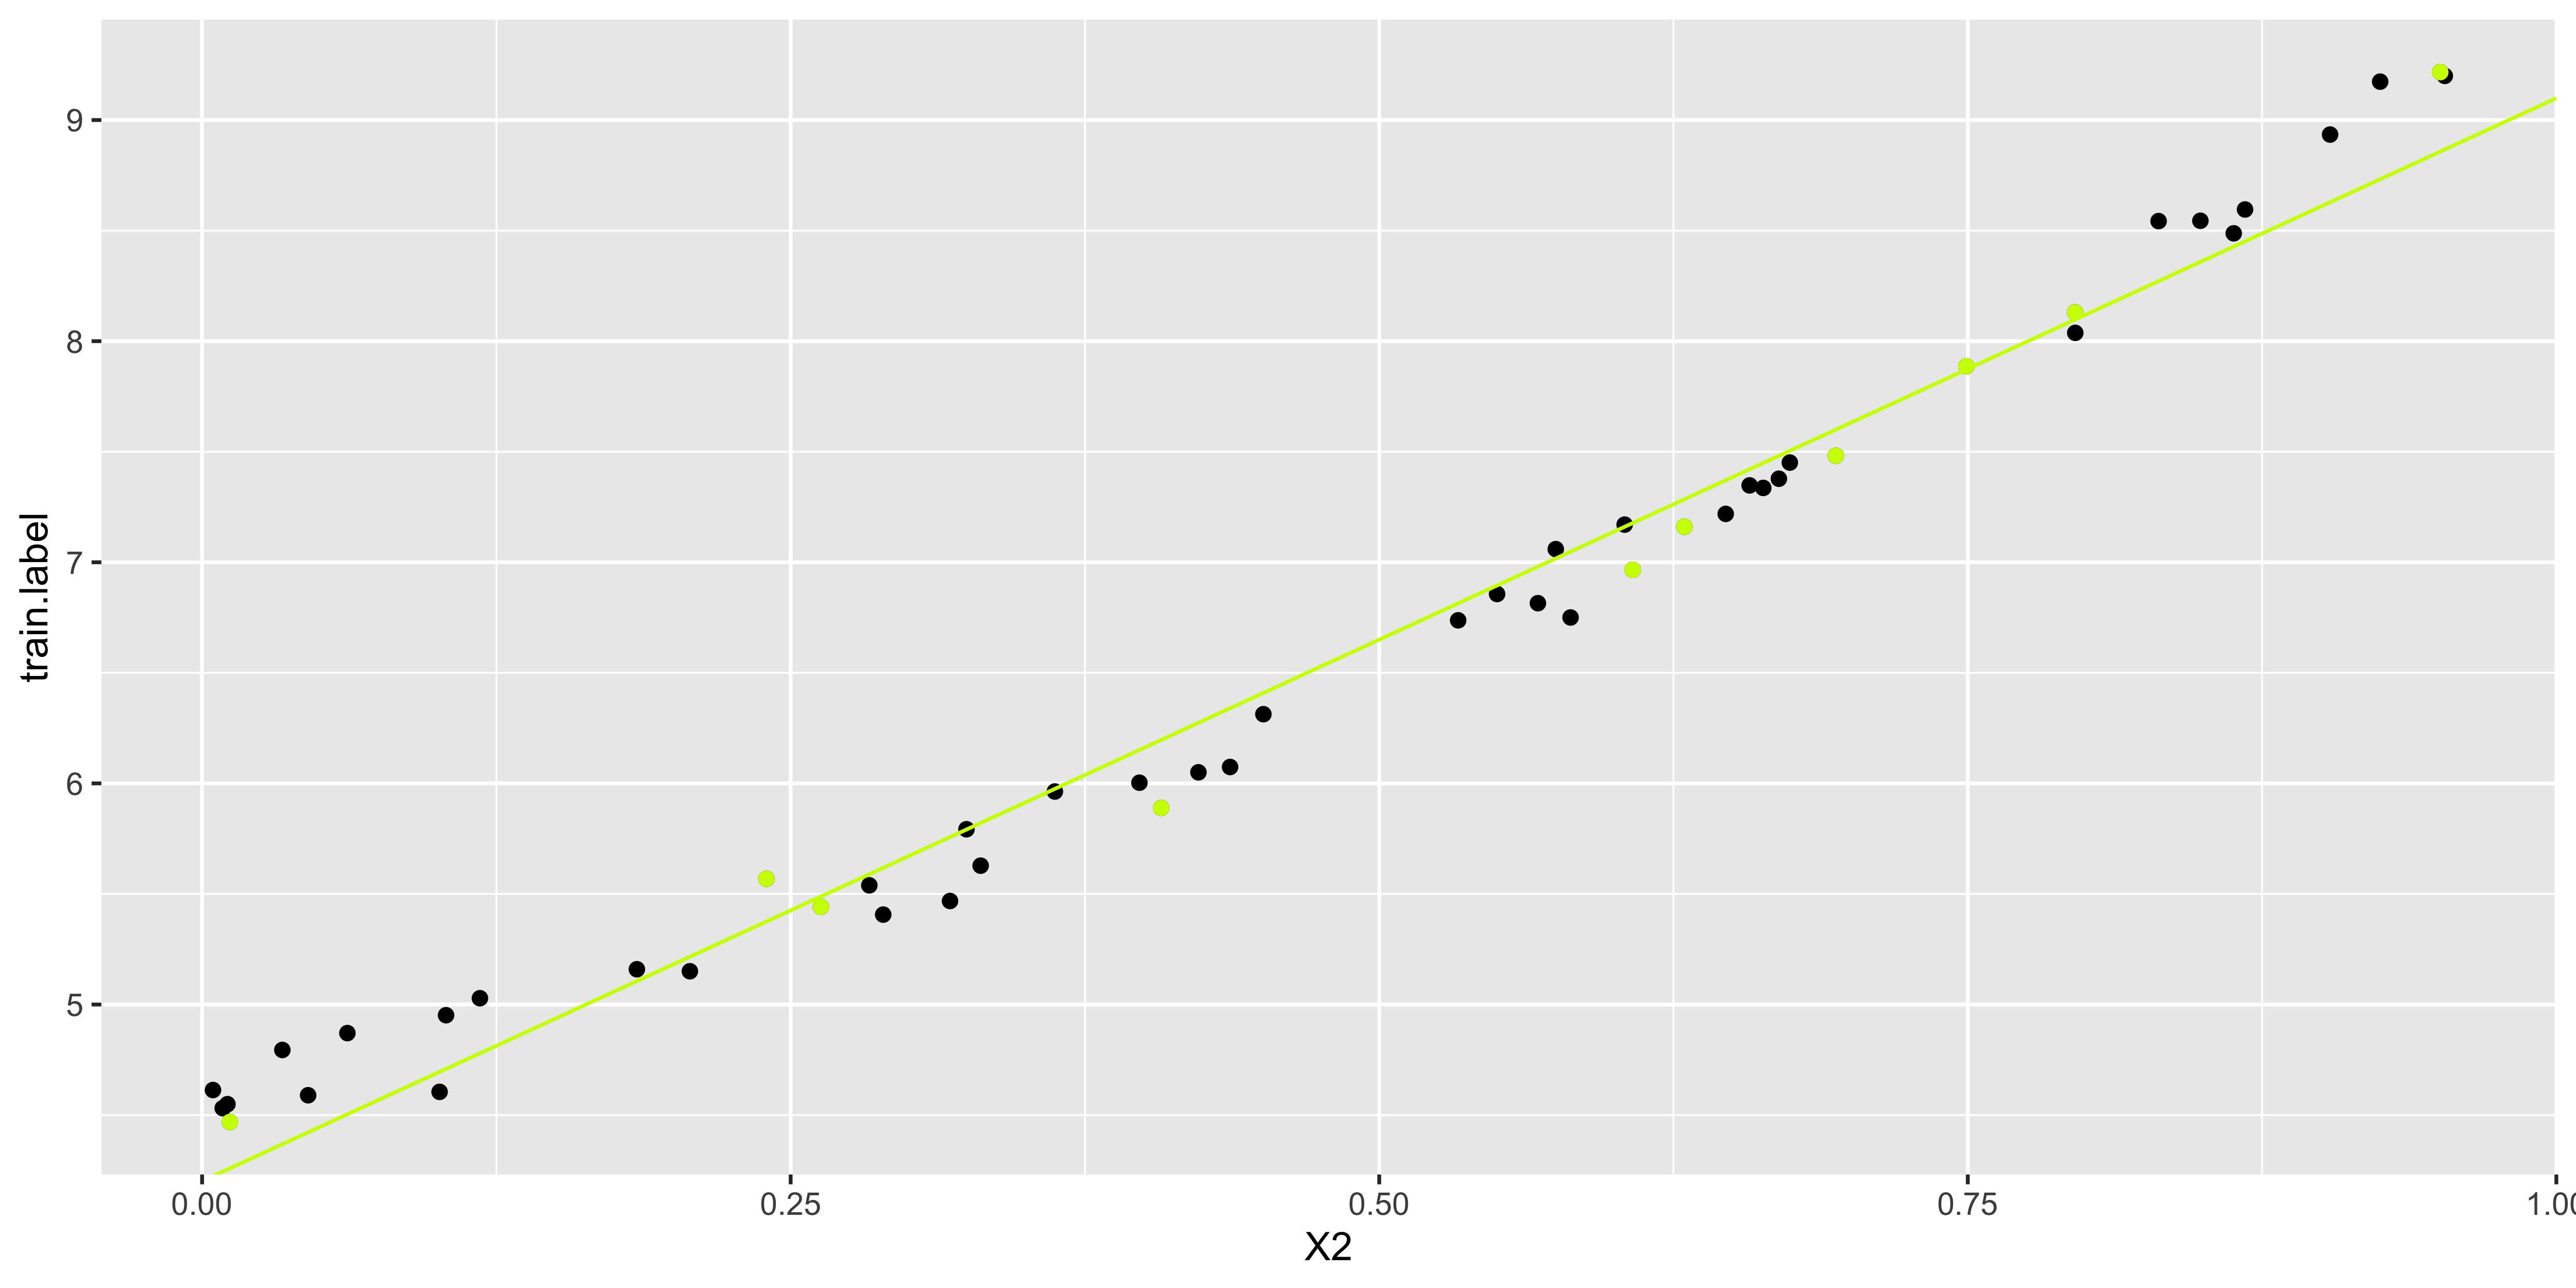

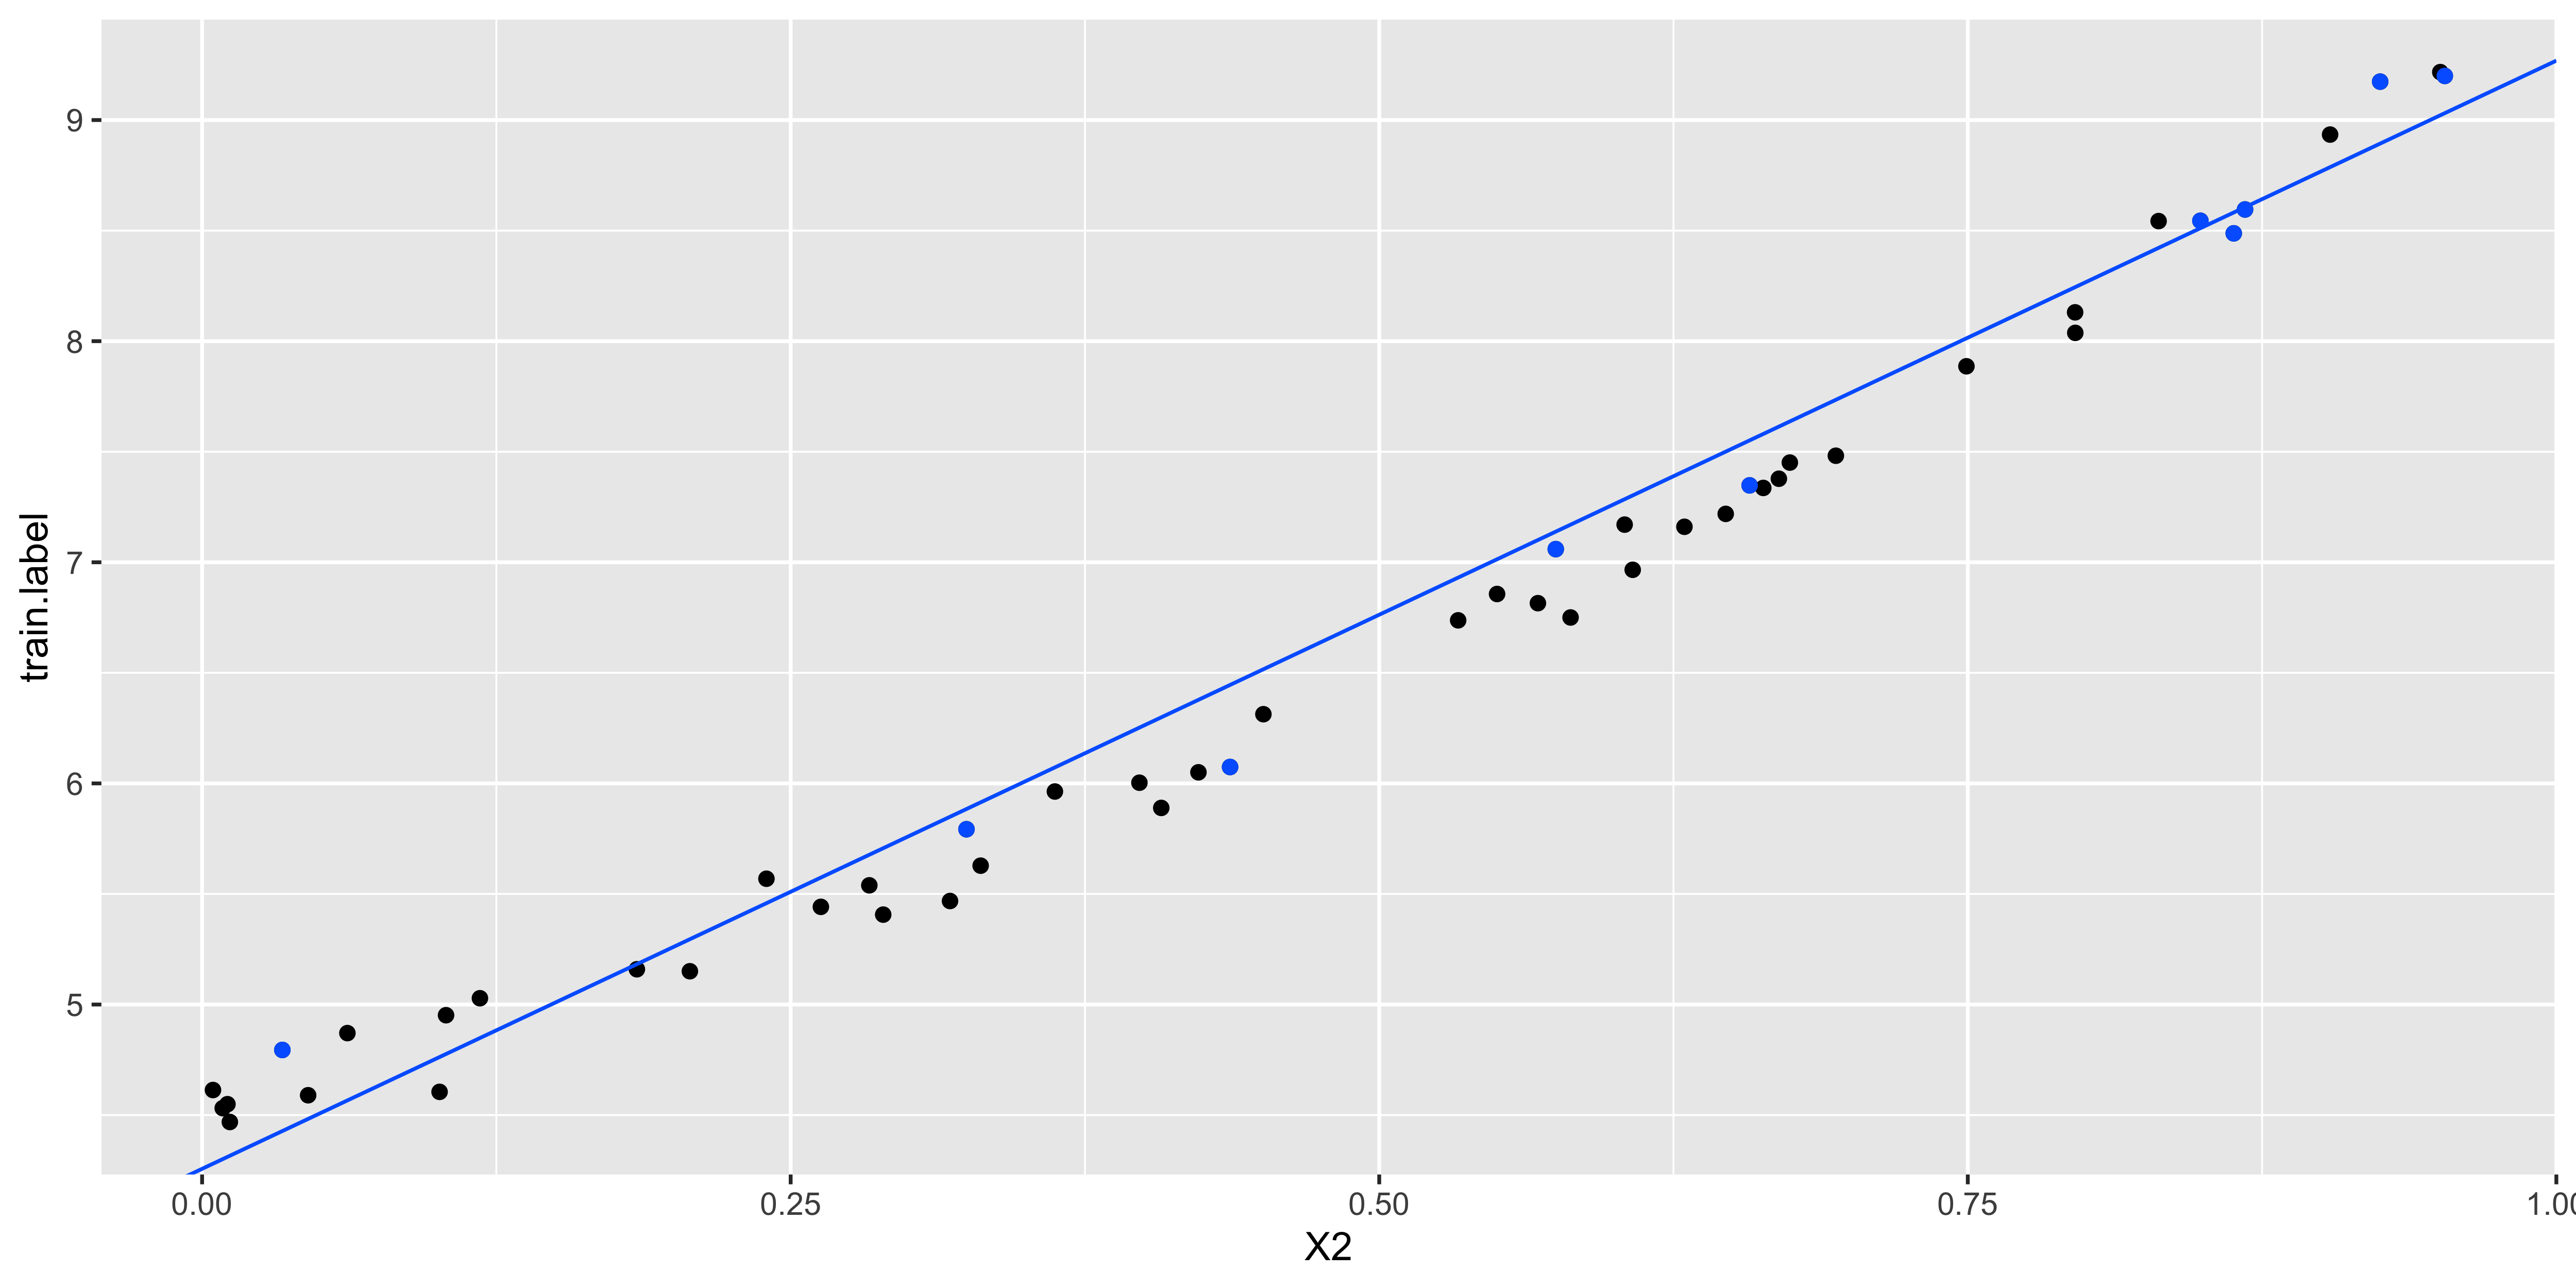

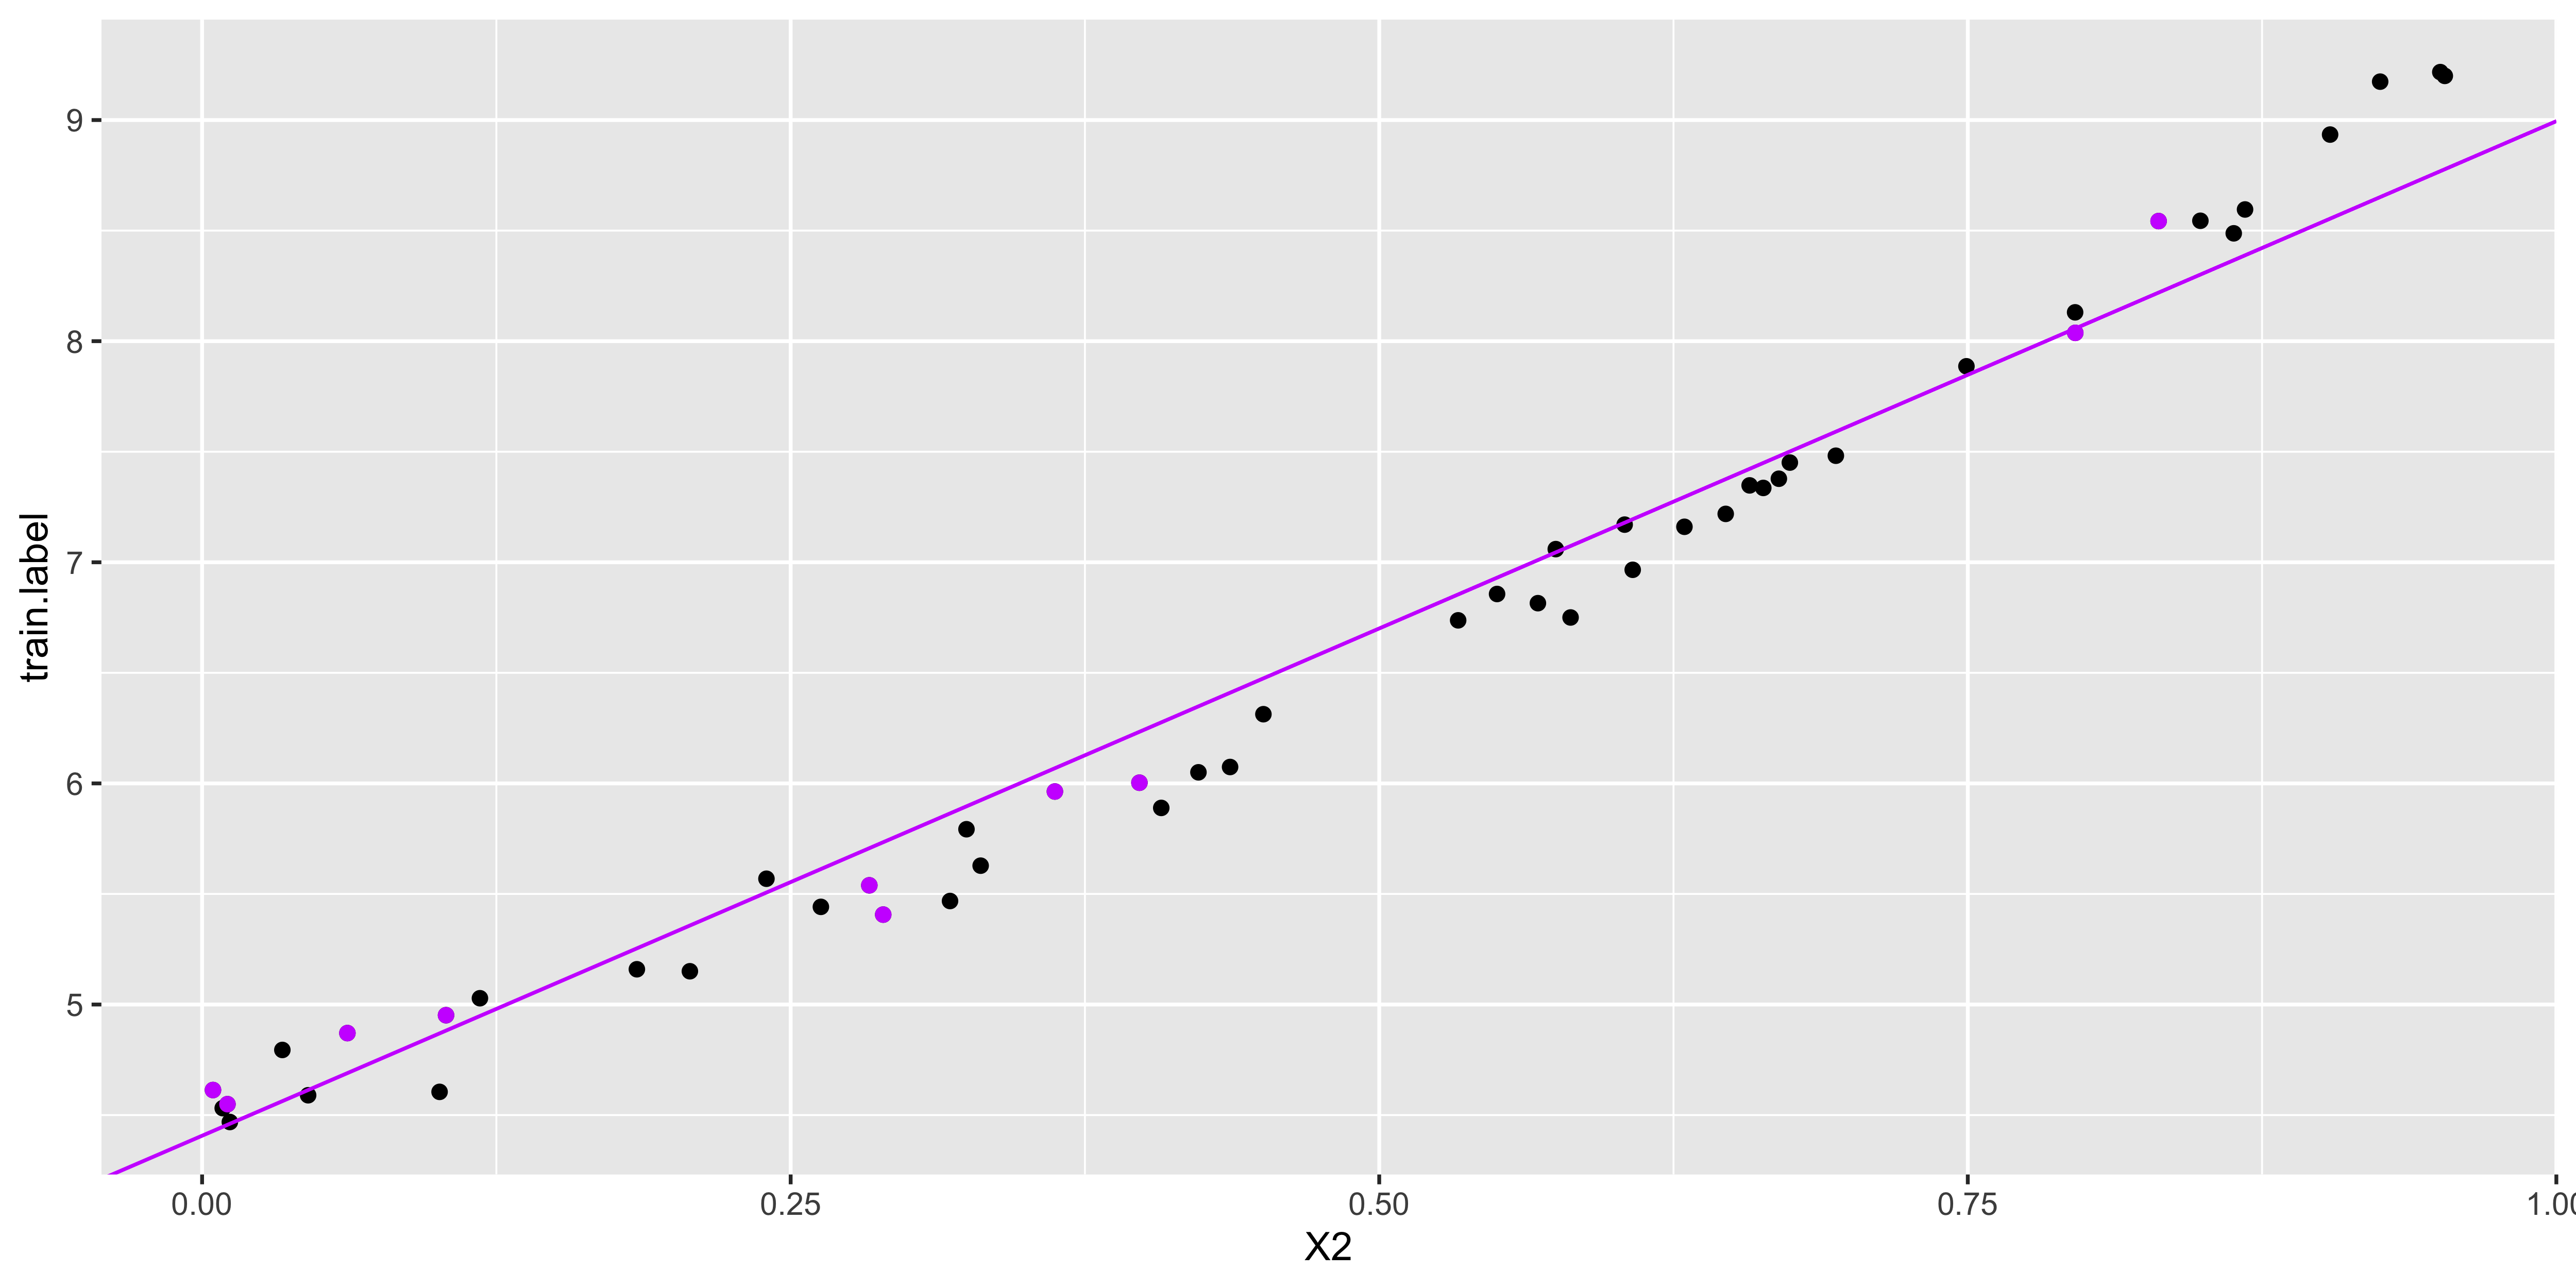

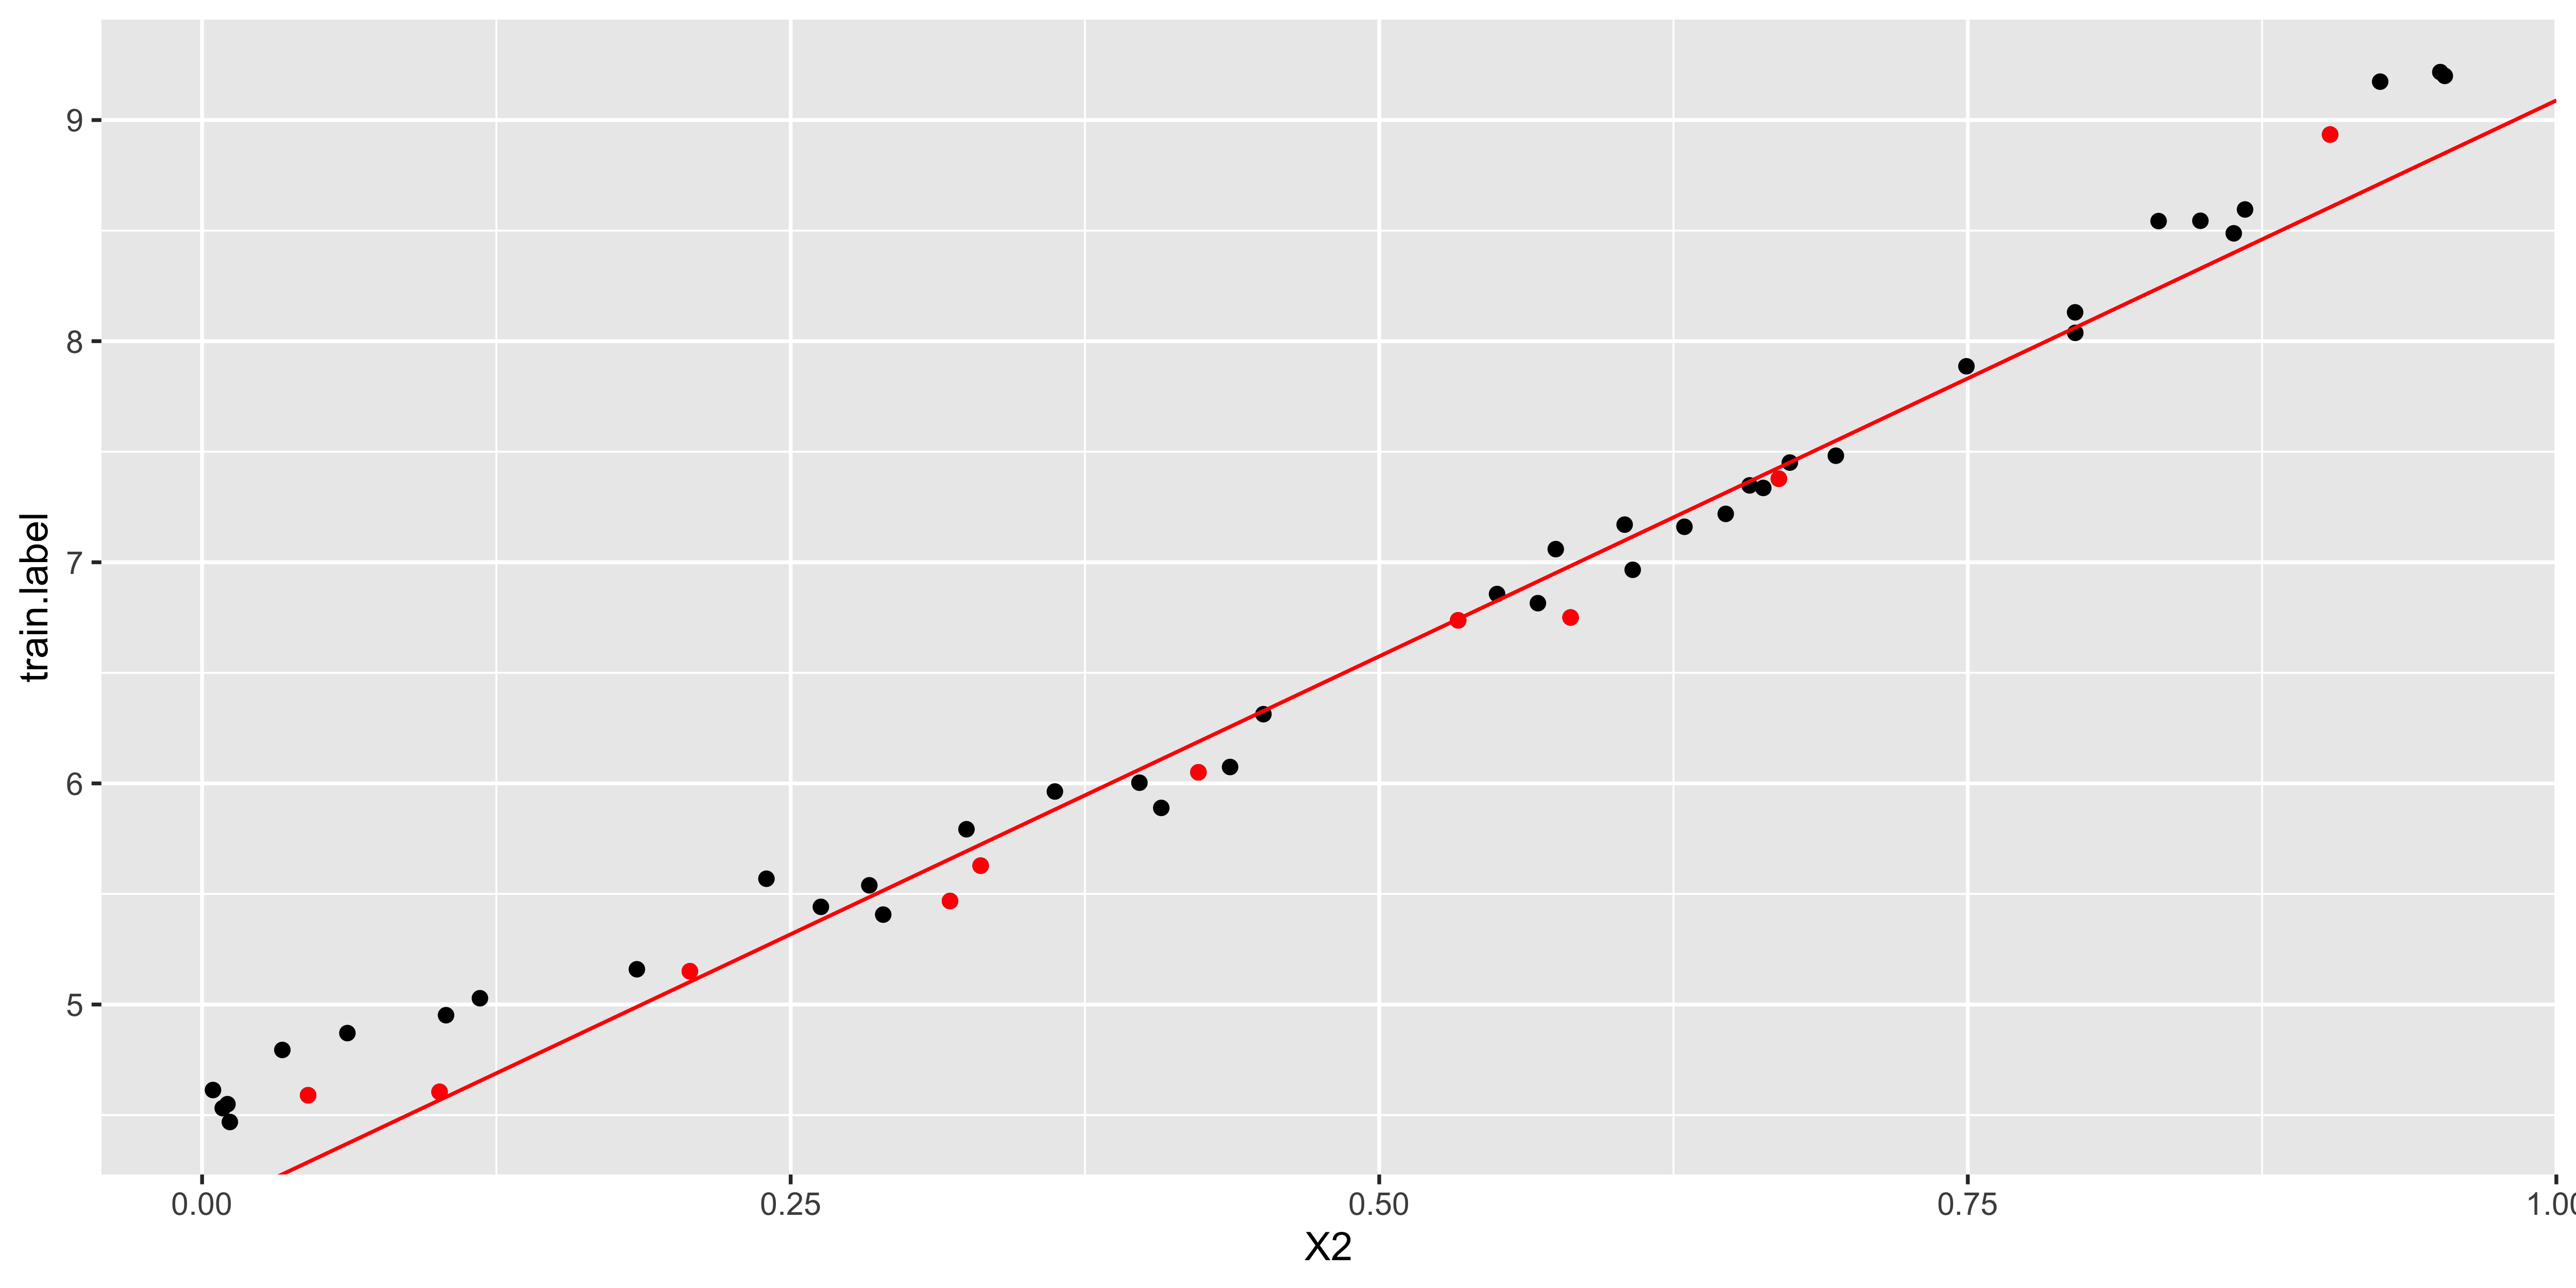

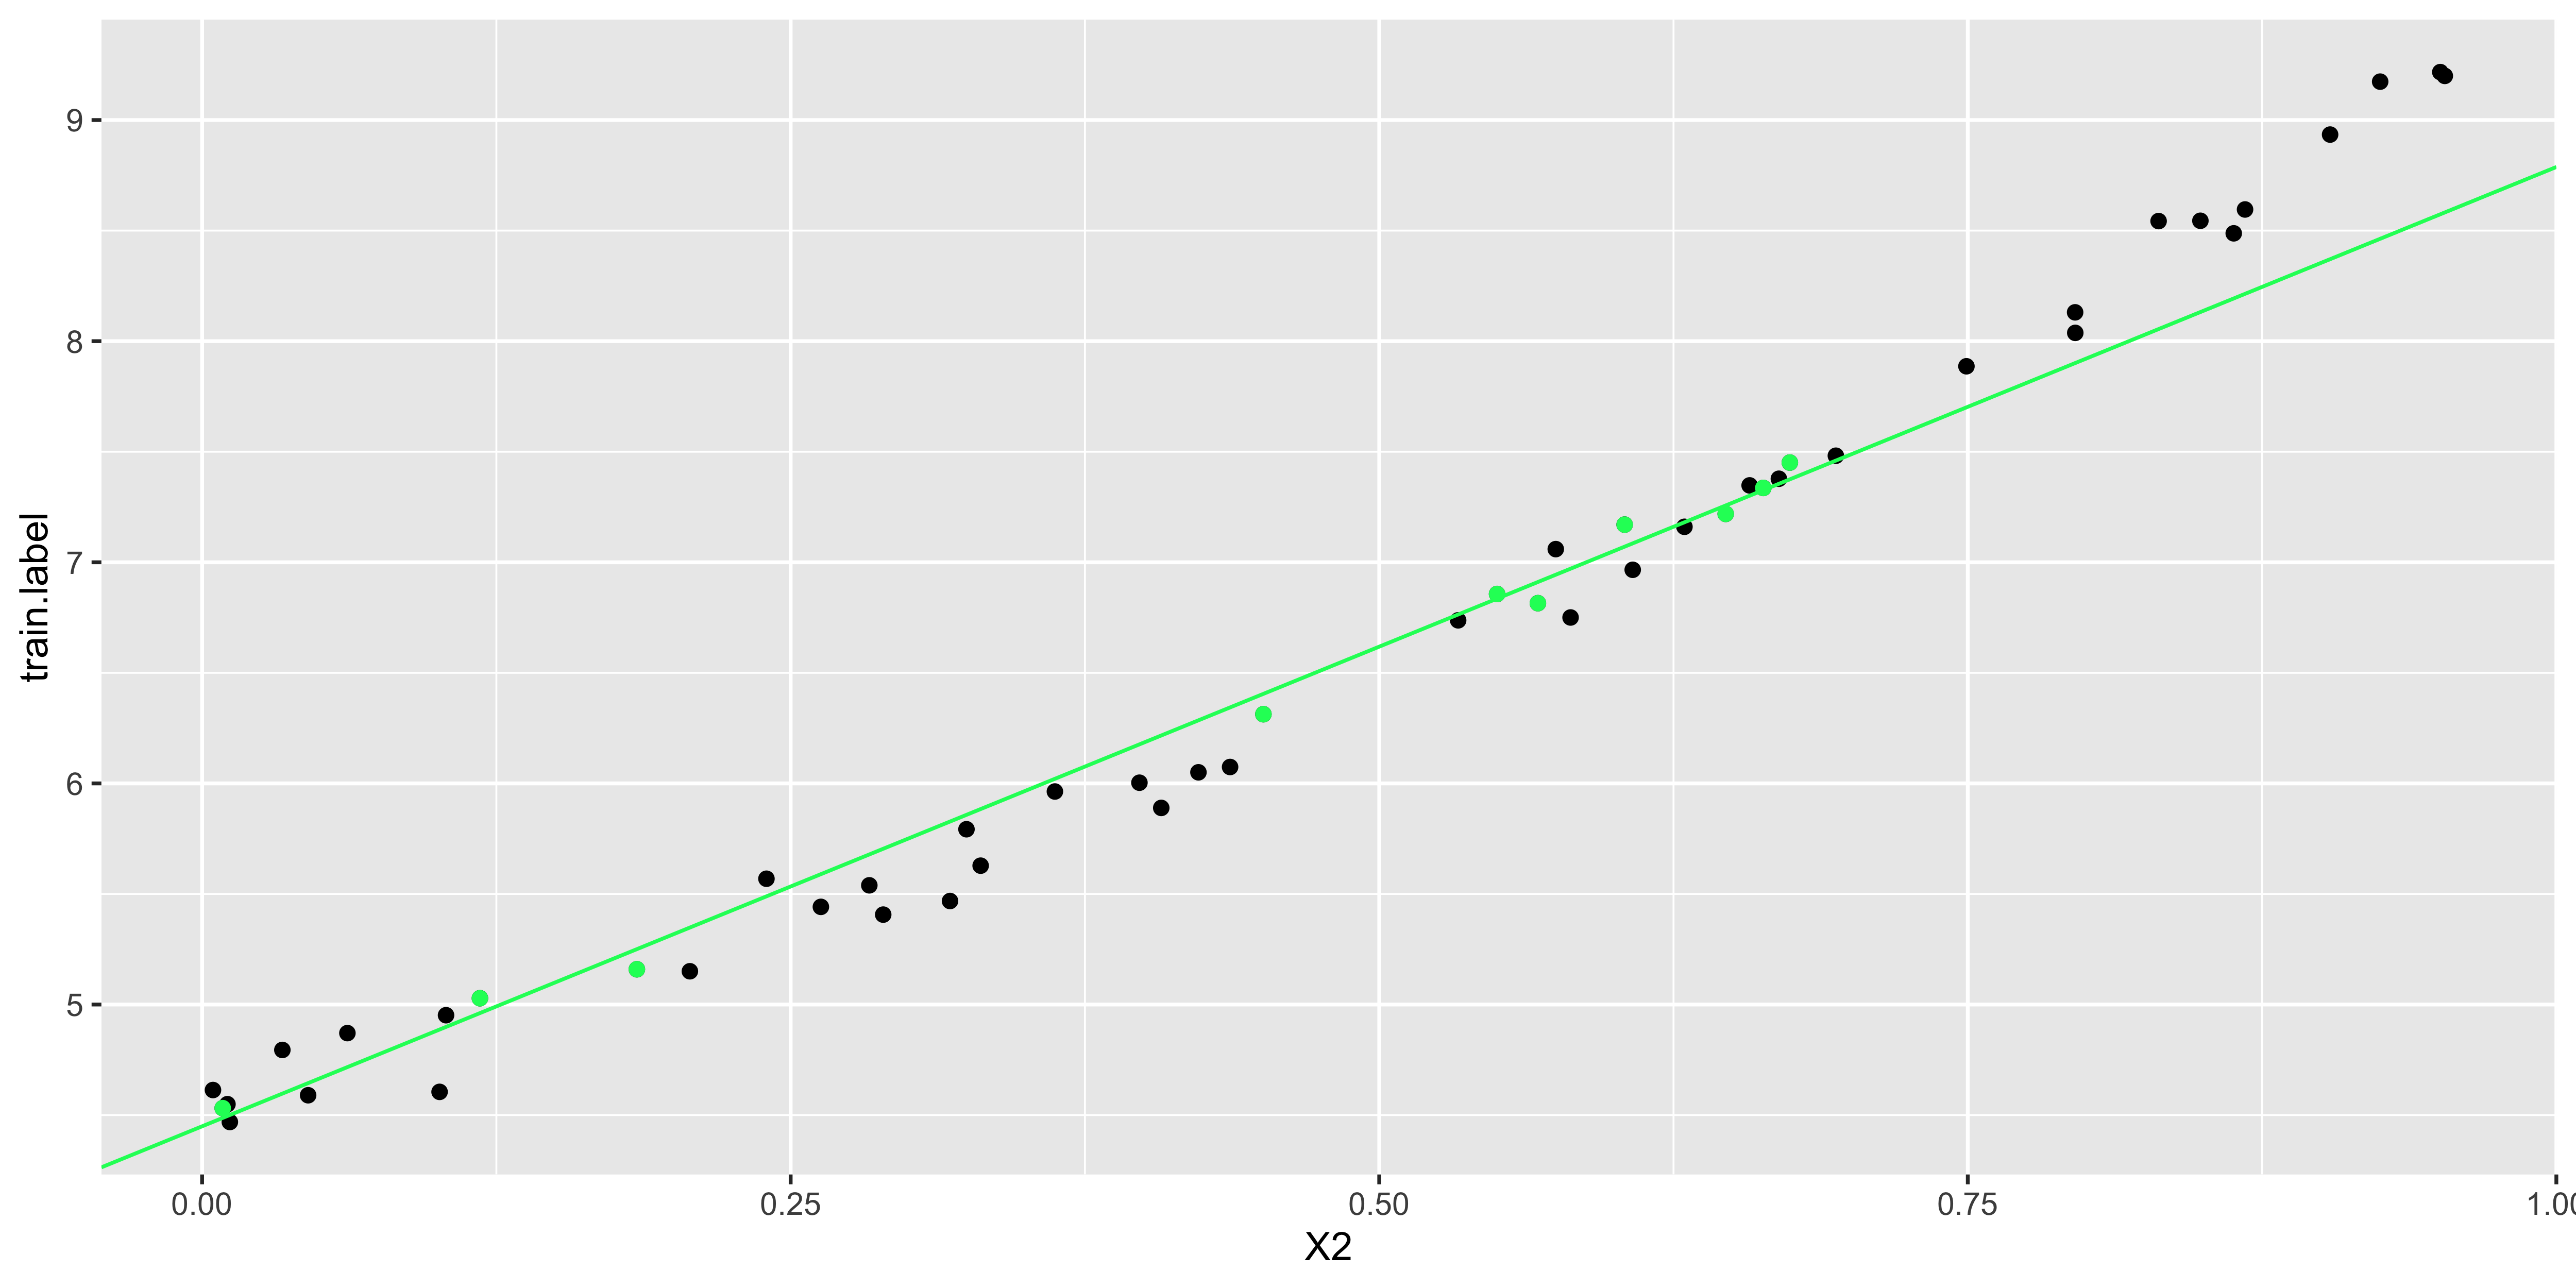

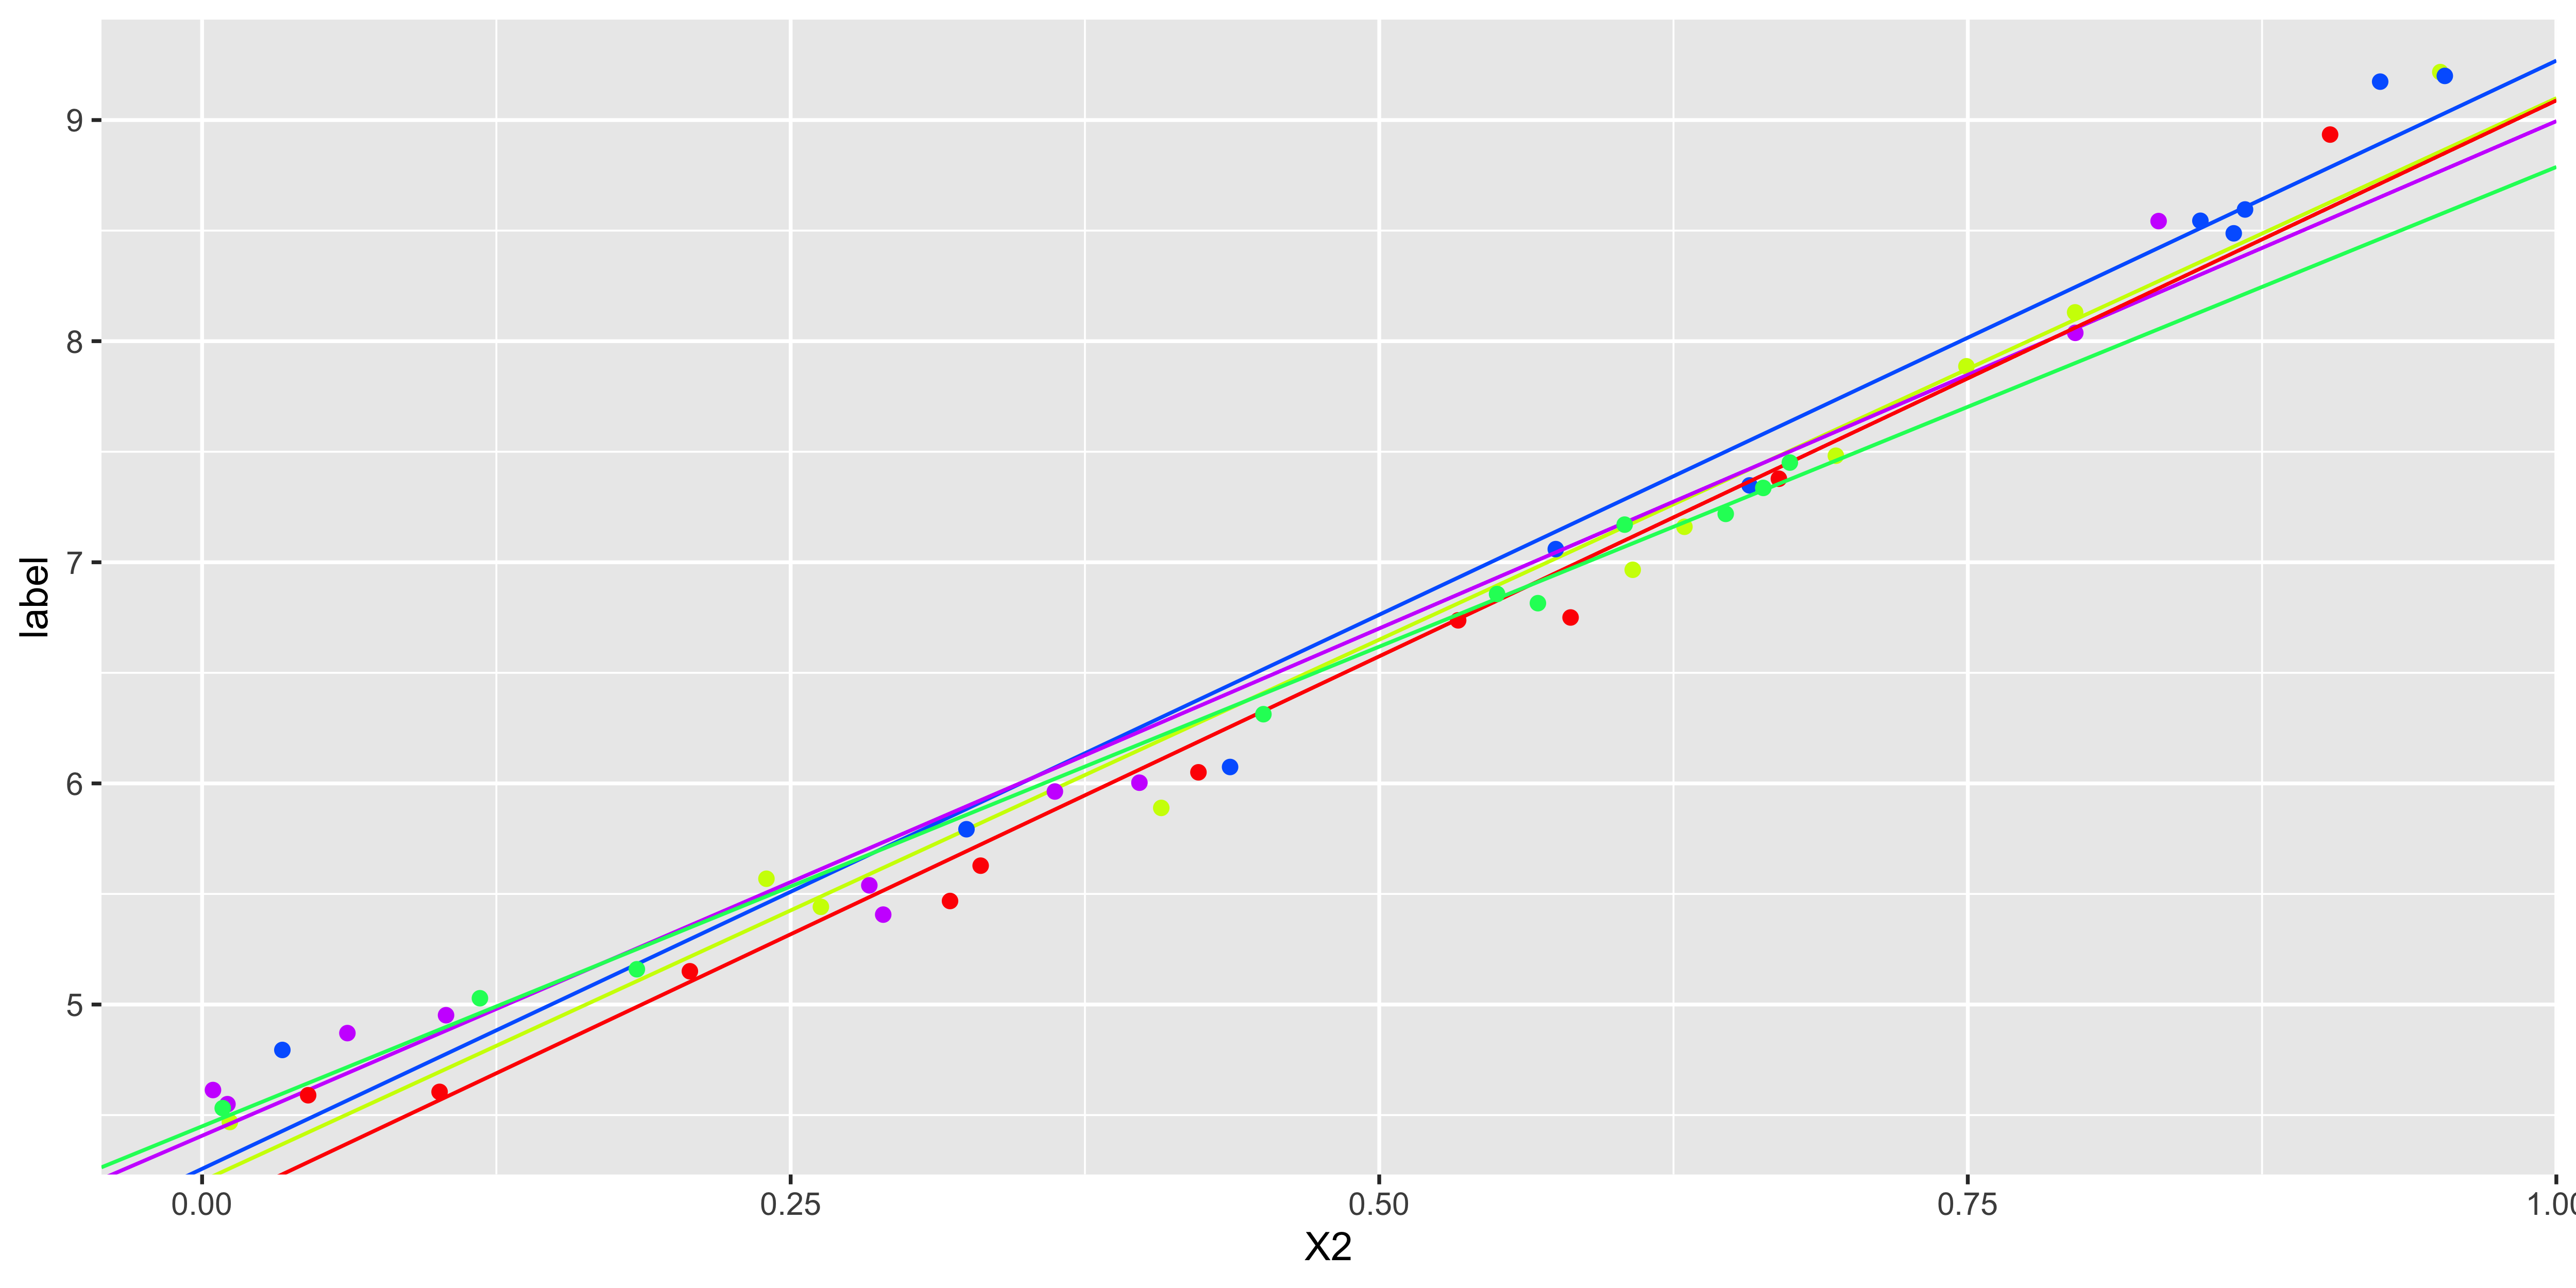

In [126]:
g <- ggplot()
palette <- rainbow(nrow(boot.idx))
palette <- palette[sample(1:length(palette), length(palette), replace = FALSE)]
for (i in 1:nrow(boot.idx)){
    
    idx <- boot.idx[i,]
    feats <- train.data[idx,]
    label <- train.label[idx]
    
    params <- solve(t(feats)%*%feats)%*%t(feats)%*%label
    
    pl <- ggplot(all_data, aes(x = X2, y = train.label)) + geom_point() +
        geom_point(data = data.frame(feats, label), aes(x = X2, y = label), color = palette[i]) + 
        geom_abline(intercept = params[1], slope = params[2], color = palette[i])
    print(pl)
    g <- g + geom_point(data = data.frame(feats, label), aes(x = X2, y = label), color = palette[i]) + 
        geom_abline(intercept = params[1], slope = params[2], color = palette[i])
    
}

g